In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"
# Read the City and Ride Data, 
city_df = pd.read_csv(city_data_to_load)
#             ['city', 'driver_count', 'type'] DF
ride_df = pd.read_csv(ride_data_to_load)
#            ['city', 'date', 'fare', 'ride_id']
# Combine the data into a single dataset
merged_df = pd.merge(ride_df, city_df)
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [25]:
#[Bubble Plot] showcases the relationship four key variables:
grouped = merged_df.groupby(['city','type'])
# * Average Fare ($) Per City
avg_fare = grouped.mean()
avg_fare
# * Total Number of Rides Per City
total_rides = grouped.count()
total_rides
# * Total Number of Drivers Per City
total_drivers = grouped.sum()
type(avg_fare)
city_df = pd.DataFrame({ 'Avg Fare':avg_fare['fare'],
                        'Total Rides' : total_rides['ride_id'],
                        'Total Drivers' : total_drivers['driver_count']})
# drop multi-index 
city_df = city_df.reset_index()
city_df = city_df.set_index('city')
# format accounting style
formatted_city_df = city_df.copy()
formatted_city_df['Avg Fare'] = formatted_city_df['Avg Fare'].map("{:,.2f}".format)
formatted_city_df.head()

,type,Avg Fare,Total Rides,Total Drivers
city,,,,
Amandaburgh,Urban,24.64,18,216
Barajasview,Urban,25.33,22,572
Barronchester,Suburban,36.42,16,176
Bethanyland,Suburban,32.96,18,396
Bradshawfurt,Rural,40.06,10,70


In [26]:
# * City Type (Urban, Suburban, Rural)
gr_type = merged_df.groupby('type')
# three pie charts:
# * % of Total Fares by City Type
perc_totalfares_type = (gr_type['fare'].sum())/(merged_df['fare'].sum())*100
# * % of Total Rides by City Type
perc_totalrides_type = (gr_type['ride_id'].count())/(merged_df['ride_id'].count())*100
# * % of Total Drivers by City Type
perc_totaldrivers_type = (gr_type['driver_count'].sum())/(merged_df['driver_count'].sum())*100
#  dataframe by dictionary of lists
type_df = pd.DataFrame({'% Fares by City Type' : perc_totalfares_type,
              '% Rides by City Type' : perc_totalrides_type,
              '% Drivers by City Type' : perc_totaldrivers_type})
type_df.head()
# formatting table
formatted_type_df = type_df.copy()
formatted_type_df['% Fares by City Type'] = formatted_type_df['% Fares by City Type'].map("{:.2f}%".format)
formatted_type_df['% Rides by City Type'] = formatted_type_df['% Rides by City Type'].map("{:.2f}%".format)
formatted_type_df['% Drivers by City Type'] =formatted_type_df['% Drivers by City Type'].map("{:.2f}%".format)
formatted_type_df.head()

,% Fares by City Type,% Rides by City Type,% Drivers by City Type
type,,,
Rural,6.81%,5.26%,0.78%
Suburban,30.46%,26.32%,12.47%
Urban,62.72%,68.42%,86.75%


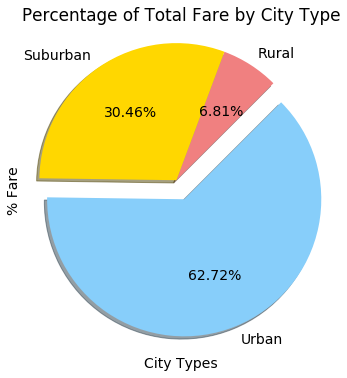

In [27]:
# first pie chart * % of Total Fares by City Type
labels = perc_totalfares_type.index.tolist()
explode = (0, 0, 0.15)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 14.0
plt.pie(perc_totalfares_type, labels = labels, explode = explode, colors = colors, startangle = 45, shadow = True, autopct="%1.2f%%")
plt.axis("scaled")
plt.title("Percentage of Total Fare by City Type")
plt.xlabel("City Types")
plt.ylabel("% Fare")
plt.savefig("Total_Fares.png", bbox_inches = 'tight', shadow=True)
plt.show()

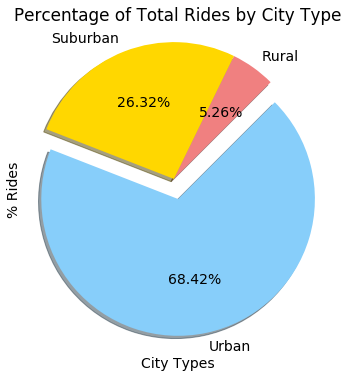

In [28]:
# second pie chart * % of Total rides by City Type
labels = perc_totalrides_type.index.tolist()
explode = (0, 0, 0.15)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 14.0
plt.pie(perc_totalrides_type, labels = labels, explode = explode, colors = colors, startangle = 45, shadow = True, autopct="%1.2f%%")
plt.axis("scaled")
plt.title("Percentage of Total Rides by City Type")
plt.xlabel("City Types")
plt.ylabel("% Rides")
plt.savefig("Total_Rides.png", bbox_inches = 'tight', shadow=True)
plt.show()

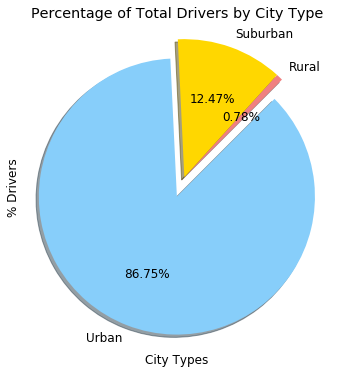

In [29]:
# third pie chart * % of Total rides by City Type
labels = perc_totaldrivers_type.index.tolist()
explode = (0, 0, 0.15)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 12.0
plt.pie(perc_totaldrivers_type, labels = labels, explode = explode, colors = colors, startangle = 45, shadow = True, autopct="%1.2f%%")
plt.axis("scaled")
plt.title("Percentage of Total Drivers by City Type")
plt.xlabel("City Types")
plt.ylabel("% Drivers")
plt.savefig("Total_Drivers.png", bbox_inches = 'tight', shadow=True)
plt.show()

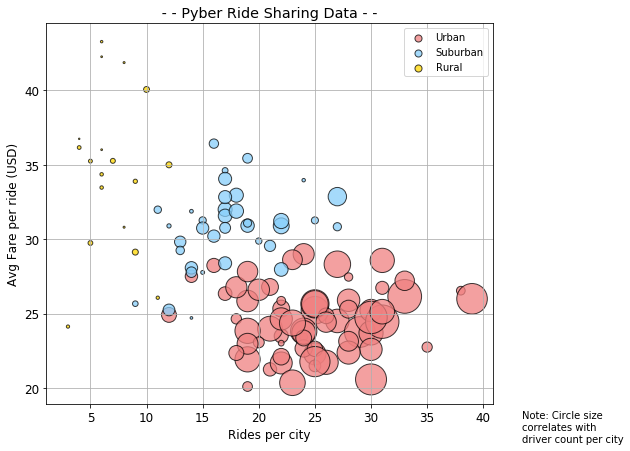

In [30]:
# Obtain the x and y coordinates for each of the three city types
types_df = city_df.copy()
types_df = types_df.reset_index()
plt.figure(figsize=(8,7))

# scale bubbles from 1 to 100
scale_bubbles = 50

# x and y coordinates for urban
urban_df=types_df.loc[types_df['type']=='Urban']
urban_y_coordinates = urban_df['Avg Fare']
urban_x_coordinates = urban_df['Total Rides']
urban_size_bubble = urban_df['Total Drivers']*(scale_bubbles/100)
urban_handle = plt.scatter(urban_x_coordinates, urban_y_coordinates, marker="o", facecolors="lightcoral", edgecolors="black", label='Urban', s=(urban_size_bubble),alpha=0.75)

# x and y coordinates for suburban
suburban_df=types_df.loc[types_df['type']=='Suburban']
suburban_y_coordinates = suburban_df['Avg Fare']
suburban_x_coordinates = suburban_df['Total Rides']
suburban_size_bubble = suburban_df['Total Drivers']*(scale_bubbles/100)
suburban_handle = plt.scatter(suburban_x_coordinates, suburban_y_coordinates, marker="o", facecolors="lightskyblue", edgecolors="black",label='Suburban' , s=(suburban_size_bubble),alpha=0.75)

# x and y coordinates for rural
rural_df=types_df.loc[types_df['type']=='Rural']
rural_y_coordinates = rural_df['Avg Fare']
rural_x_coordinates = rural_df['Total Rides']
rural_size_bubble = rural_df['Total Drivers']*(scale_bubbles/100)
rural_handle = plt.scatter(rural_x_coordinates, rural_y_coordinates, marker="o", facecolors="gold", edgecolors="black", label='Rural', s=(rural_size_bubble),alpha=0.75)

plt.title(" - - Pyber Ride Sharing Data - - ")
plt.xlabel("Rides per city")
plt.ylabel("Avg Fare per ride (USD)")
plt.figtext(.95, .05, "Note: Circle size\ncorrelates with \ndriver count per city", fontsize=10)

# Incorporate the other graph properties
# Create a legend
lgnd = plt.legend(handles=[urban_handle, suburban_handle, rural_handle], scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
# Incorporate a text label regarding circle size
# Save Figure
plt.savefig("Ride_Sharing_Data.png", bbox_inches = 'tight')
plt.grid()
plt.show()

In [31]:
#  ----Trend Analysis----
# one of the findings of this data analysis will be the fact that the PyBer market share 
#     in urban areas are significantly larger than either of suburban and rural thus will 
#     open more jobs for new drivers
# per profitability however, it is also clearly seen that suburban rides generate more revenues
#     thus expectedly higher profit for PyBer drivers    
# per risk, being a PyBer driver in urban areas is less risky due to large market share, more rides
#     available while those who drive in rural/suburban cities enjoy high profit fare

